In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('./data/shots/combined_csv.csv')

In [7]:
df.shape

(210072, 17)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210072 entries, 0 to 210071
Data columns (total 17 columns):
Unnamed: 0                7259 non-null float64
away team                 210072 non-null object
current shot outcome      210072 non-null object
date                      210072 non-null object
home game                 210072 non-null object
home team                 210072 non-null object
location x                209675 non-null float64
location y                209675 non-null float64
opponent previous shot    208462 non-null object
player position           210072 non-null object
points                    210072 non-null int64
quarter                   210072 non-null int64
self previous shot        207612 non-null object
shoot player              210072 non-null object
shot type                 210072 non-null object
time                      210072 non-null object
time from last shot       200072 non-null float64
dtypes: float64(4), int64(2), object(11)
memory usage: 2

In [9]:
df = df.drop(['Unnamed: 0','self previous shot', 'opponent previous shot', 'time from last shot'], axis = 1)
df = df.rename(columns={'player position':'player_position','shot type':'shot_type','away team': 'away_team','current shot outcome':'outcome', 'home team' : 'home_team', 'location x':'loc_x','location y':'loc_y','shoot player':'shooter','home game':'home'})

In [10]:
df_home = df[df.home=='Yes']

In [11]:
df_away = df[df.home=='No']

In [12]:
mirror_q_away = [1,2]
mirror_q_home = [3,4,5,6,7,8]

In [13]:
middle_x = 470.0
middle_y = 250.0

In [14]:
df_home_mirror = df_home[df_home.quarter.isin(mirror_q_home)]
df_home_notmirror = df_home[~df_home.quarter.isin(mirror_q_home)]
df_away_mirror = df_away[df_away.quarter.isin(mirror_q_away)]
df_away_notmirror = df_away[~df_away.quarter.isin(mirror_q_away)]

In [15]:
df_home.shape, df_home_mirror.shape, df_home_notmirror.shape, df_away.shape, df_away_mirror.shape, df_away_notmirror.shape

((104925, 13),
 (51073, 13),
 (53852, 13),
 (105147, 13),
 (53510, 13),
 (51637, 13))

In [16]:
df_home_mirror = df_home_mirror[df_home_mirror.loc_x >= middle_x]
df_home_notmirror = df_home_notmirror[df_home_notmirror.loc_x <= middle_x]
df_away_mirror = df_away_mirror[df_away_mirror.loc_x >= middle_x]
df_away_notmirror = df_away_notmirror[df_away_notmirror.loc_x <= middle_x]

In [17]:
df_home.shape, df_home_mirror.shape, df_home_notmirror.shape, df_away.shape, df_away_mirror.shape, df_away_notmirror.shape

((104925, 13),
 (50914, 13),
 (53568, 13),
 (105147, 13),
 (53264, 13),
 (51430, 13))

In [18]:
df_home_mirror['loc_x'] = df_home_mirror['loc_x'].apply(lambda row: row - 2*(row-middle_x))
df_home_mirror['loc_y'] = df_home_mirror['loc_y'].apply(lambda row: row - 2*(row-middle_y) if row > 250.0 else row + 2*(middle_y-row))

In [19]:
df_away_mirror['loc_x'] = df_away_mirror['loc_x'].apply(lambda row: row - 2*(row-middle_x))
df_away_mirror['loc_y'] = df_away_mirror['loc_y'].apply(lambda row: row - 2*(row-middle_y) if row > 250.0 else row + 2*(middle_y-row))

In [20]:
df_home_mirror.shape

(50914, 13)

In [21]:
df_home = df_home_notmirror.append(df_home_mirror)
df_away = df_away_notmirror.append(df_away_mirror)

In [22]:
df_home.shape, df_away.shape

((104482, 13), (104694, 13))

In [23]:
df = df_home.append(df_away)

In [24]:
df.shape

(209176, 13)

In [25]:
df.to_csv('./shots_dataframe2.csv', index=False,header=False)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209176 entries, 0 to 210031
Data columns (total 13 columns):
away_team          209176 non-null object
outcome            209176 non-null object
date               209176 non-null object
home               209176 non-null object
home_team          209176 non-null object
loc_x              209176 non-null float64
loc_y              209176 non-null float64
player_position    209176 non-null object
points             209176 non-null int64
quarter            209176 non-null int64
shooter            209176 non-null object
shot_type          209176 non-null object
time               209176 non-null object
dtypes: float64(2), int64(2), object(9)
memory usage: 22.3+ MB


In [27]:
%run ./courts.py

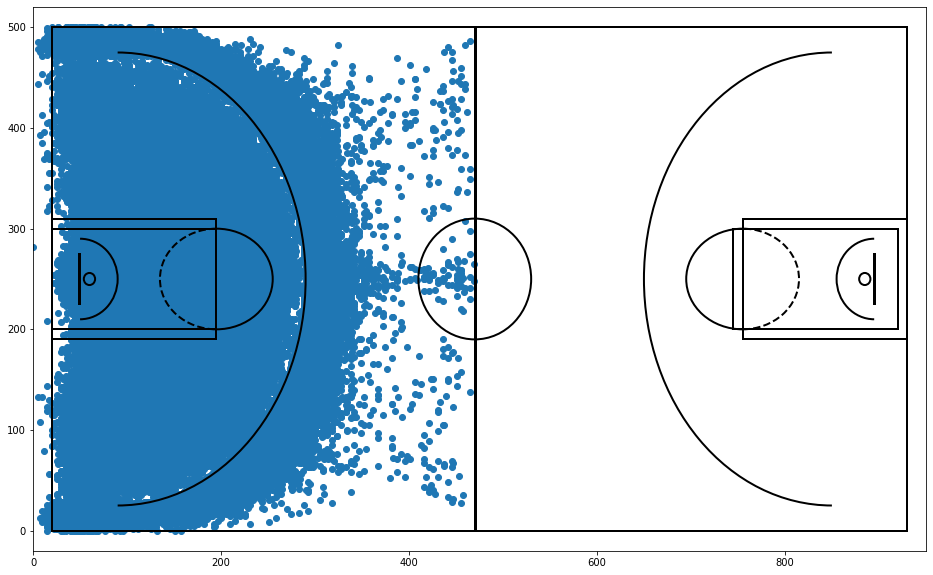

In [28]:
plt.figure(figsize=(16,10))
draw_court(outer_lines=True)
plt.xlim(0,950)
plt.ylim(-20,520)
plt.scatter(df['loc_x'],df['loc_y'])
plt.show()

In [30]:
df = df[df['home_team']=='ATL']

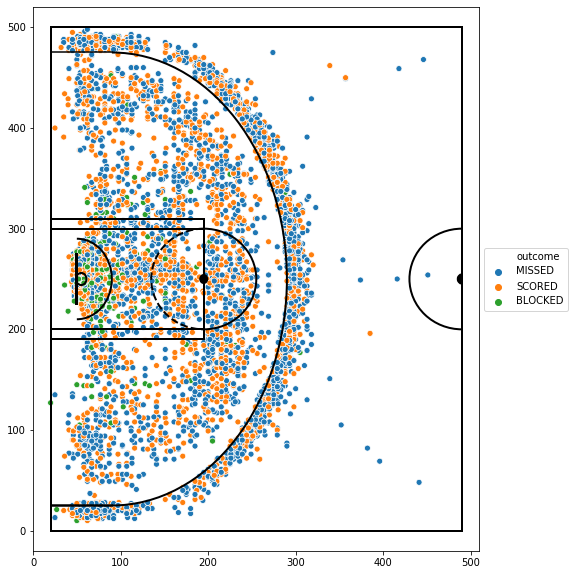

In [31]:
plt.figure(figsize=(8,10))
sns.scatterplot(x='loc_x',y='loc_y',hue='outcome',data=df)
draw_half_court(outer_lines=True)
plt.xlim(0,510)
plt.ylim(-20,520)
plt.xlabel('')
plt.ylabel('')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.show()